![agents](images/header.jpg)
# Análisis sintáctico
### Ramón Soto C. [(rsotoc@moviquest.com)](mailto:rsotoc@moviquest.com/)
[ver en nbviewer](http://nbviewer.ipython.org/github/rsotoc/nlp/blob/master/Introducción.ipynb)

![ ](images/blank.png)
## Definición

El objetivo del análisis sintáctico es analizar un flujo de caracteres, o de tokens, para identificar la estructura en frases del mensaje.

![](images/nlp02d.png)

En las aproximaciones al procesamiento de lenguaje natural basada en [lingüísticas generativas](https://en.wikipedia.org/wiki/Generative_grammar), el análisis sintáctico suele referirse a encontrar la estructura gramatical del texto en términos de las frases que lo conforman. Esta es posiblemente el área mejor establecida en el campo de procesamiento de lenguaje natural gracias a los avances realizados en el área de gramáticas formales/generativas.

### Gramática

La Real Academia de la Lengua define la [gramática](drive.google.com/drive/folders/0B3Xu6MK8u7nbWFVIai04SWhMMXM) como:

> 3 f. Parte de la lingüística que estudia los elementos de una lengua, así como la forma en que estos se organizan y se combinan. 

La gramática se enfoca en las categorías a las que pertenece cada elemento lingüístico (no en el significado, que corresponde a la semántica) para comprender las formas en que estos elementos se pueden combinar para formar estructuras, oraciones y frases (a lo que llamamos sintaxis).

## Gramáticas formales

Una gramática (formal) se define como la tupla

$$G = (N,\Sigma,P,S)$$

donde

* $N$ es un conjunto finito de símbolos  no-terminales (variables a substituir)
* $\Sigma$ es un conjunto finito de símbolos terminales llamado el *alfabeto* o *vocabulario*
* $S\in N$ es el *símbolo inicial*, es decir el símbolo no terminal desde donde se inicia la construcción de una *'frase'*
* $P$ es un conjunto finito de *reglas de producción*, es decir, reglas que definen cómo pueden irse reemplazando los símbolos no-terminales, desde el símbolo inicial, hasta tener una frase terminada.

La forma de las reglas de producción determinan el tipo de gramática y el correspondiente autómata. 

Cada gramática está asociado a un tipo de *autómata* que sería, en realidad, el responsable de reconocer los patrones generables por la gramática correspondiente.

Un lenguaje, es un conjunto de secuencias o cadenas sobre $\Sigma$: $L(G) \subseteq \Sigma^*$. Cuando se aplica la teoría de gramáticas formales al lenguaje natural, el vocabulario es usualmente un conjunto de letras, signos, palabras, morfemas o sonidos.

Los tipos principales de autómata están definidos mediante la jerarquía de Chomsky:

Gramática | Lenguaje | Autómata
-| 
Tipo 0 | Recursivamente enumerable |	Máquina de Turing
Tipo 1 | Dependiente del contexto | Autómata linealmente acotado
Tipo 2 | Independiente del contexto | Autómata de pila
Tipo 3 | Regular | Autómata finito

El orden del tipo de gramática, en esta jeraarquía, aumenta conforme se agregan restricciones a las reglas de producción y se delimita con ello las producciones que conforman el lenguaje correspondiente. Así, las gramáticas de tipo 1 se obtienen al agregar restricciones a las gramáticas de tipo 0. Estas restricciones tienen el fin de hacer el problema más tratable, lo cual es particularmente importante desde un punto de vista computacional. 

Las gramáticas de tipo 2 agregan restricciones adicionales a las gramáticas de tipo 1 y en ese punto ya encontramos herramientas automáticas, como la clase **CFG** del módulo [NLTK](http://www.nltk.org) de Python.

In [1]:
import nltk
from nltk.parse.generate import generate
from nltk import CFG
from IPython.display import Image, display  

grammar = nltk.CFG.fromstring("""
    S -> A
    A -> 'a'A
    A -> '{' B
    B -> 'b'C
    C -> '}'C
    C -> 'c'C
    C -> 'c'
    """)

parser = nltk.ChartParser(grammar)
print(grammar)

Grammar with 7 productions (start state = S)
    S -> A
    A -> 'a' A
    A -> '{' B
    B -> 'b' C
    C -> '}' C
    C -> 'c' C
    C -> 'c'


Esta gramática permite generar cadenas de letras 'a', seguidas de una 'b' encerrada entre llaves y cualquier cantidad de letras 'c'; por ejemplo la cadena "aaa{b}ccc", cuyo árbol de generación es:

Árbol de generación de la cadena "aaa{b}ccc"


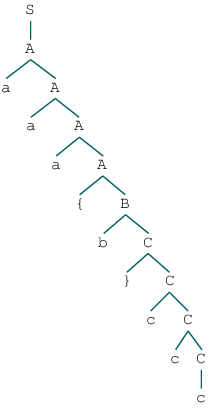

In [2]:
X = "aaa{b}ccc"
print("Árbol de generación de la cadena \"{}\"".format(X))
for tree in parser.parse(list(X)):
    display(tree) # tree.draw() arroja una ventana emergente

Grammar with 26 productions (start state = ORACION)
    ORACION -> SUJETO PREDICADO
    SUJETO -> FRASE_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL CALIFICATIVO
    GRUPO_NOMINAL -> NOMBRE
    GRUPO_NOMINAL -> ARTICULO NOMBRE
    CALIFICATIVO -> CONJUNCION ORACION
    CALIFICATIVO -> ADJETIVO
    PREDICADO -> VERBO COMPLEMENTOS
    COMPLEMENTOS -> DIRECTO INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> DIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> CIRCUNSTANCIAL
    CIRCUNSTANCIAL -> 
    CIRCUNSTANCIAL -> CIRCUNSTANCIAL CIRCUNSTANCIAL
    DIRECTO -> FRASE_NOMINAL
    INDIRECTO -> 'a' FRASE_NOMINAL
    CIRCUNSTANCIAL -> PREPOSICION FRASE_NOMINAL
    NOMBRE -> 'niña'
    NOMBRE -> 'María'
    NOMBRE -> 'comida'
    NOMBRE -> 'parque'
    ARTICULO -> 'la'
    ARTICULO -> 'el'
    VERBO -> 'pedía'
    PREPOSICION -> 'en'
Árbol de generación de la cadena "la niña pedía comida a María en el parque"


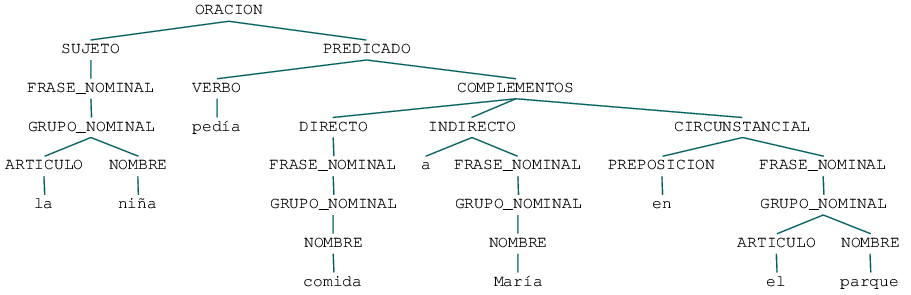

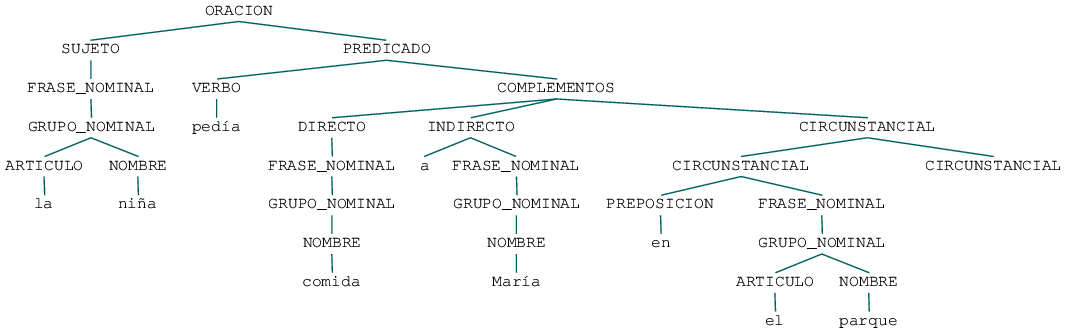

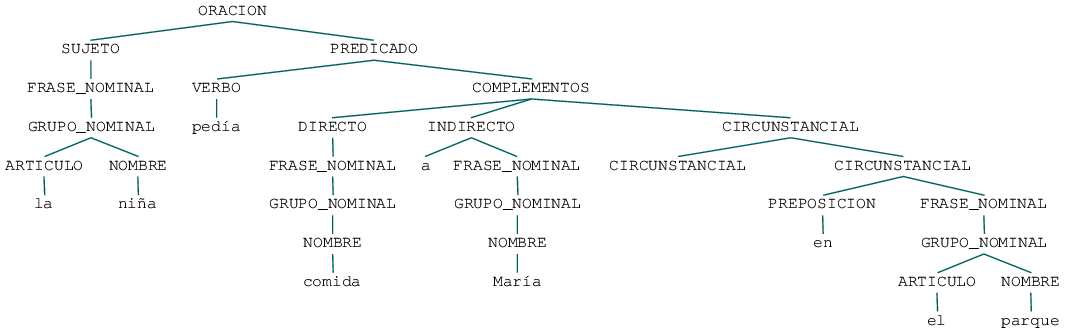

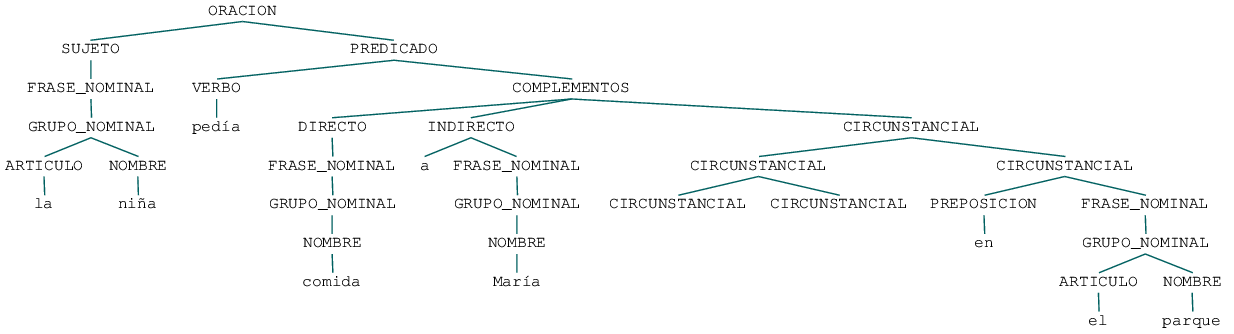

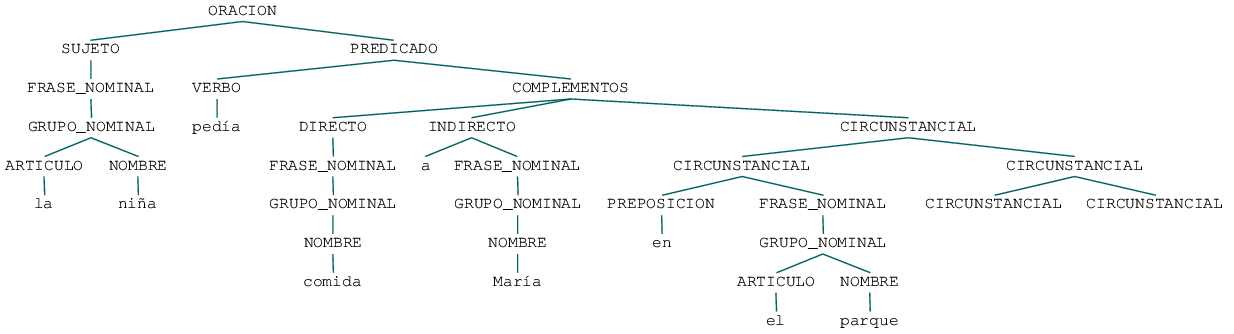

In [15]:
import nltk
from nltk.parse.generate import generate
from nltk import CFG
from IPython.display import Image, display  

grammar_sp = nltk.CFG.fromstring("""
    ORACION -> SUJETO PREDICADO
    SUJETO -> FRASE_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL
    FRASE_NOMINAL -> GRUPO_NOMINAL CALIFICATIVO
    GRUPO_NOMINAL -> NOMBRE
    GRUPO_NOMINAL -> ARTICULO NOMBRE
    CALIFICATIVO -> CONJUNCION ORACION
    CALIFICATIVO -> ADJETIVO
    PREDICADO -> VERBO COMPLEMENTOS
    COMPLEMENTOS -> DIRECTO INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> DIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> INDIRECTO CIRCUNSTANCIAL
    COMPLEMENTOS -> CIRCUNSTANCIAL
    CIRCUNSTANCIAL -> 
    CIRCUNSTANCIAL -> CIRCUNSTANCIAL CIRCUNSTANCIAL
    DIRECTO -> FRASE_NOMINAL
    INDIRECTO -> 'a' FRASE_NOMINAL
    CIRCUNSTANCIAL -> PREPOSICION FRASE_NOMINAL
    NOMBRE -> 'niña'
    NOMBRE -> 'María'
    NOMBRE -> 'comida'
    NOMBRE -> 'parque'
    ARTICULO -> 'la'
    ARTICULO -> 'el'
    VERBO -> 'pedía'
    PREPOSICION -> 'en'
    """)

parser_sp = nltk.ChartParser(grammar_sp)
print(grammar_sp)

X_sp = "la niña pedía comida a María en el parque"
print("Árbol de generación de la cadena \"{}\"".format(X_sp))
for tree in parser_sp.parse(list(X_sp.split())):
    display(tree) # tree.draw() arroja una ventana emergente

Árbol de generación de la cadena "la niña pedía comida en el parque"


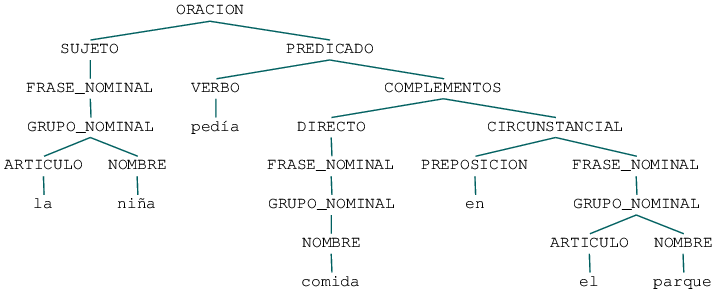

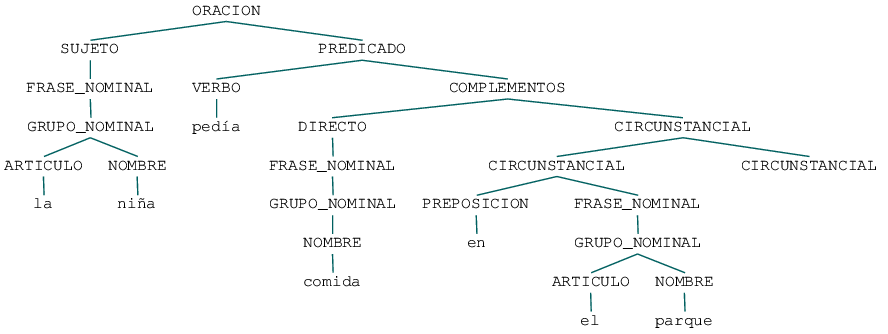

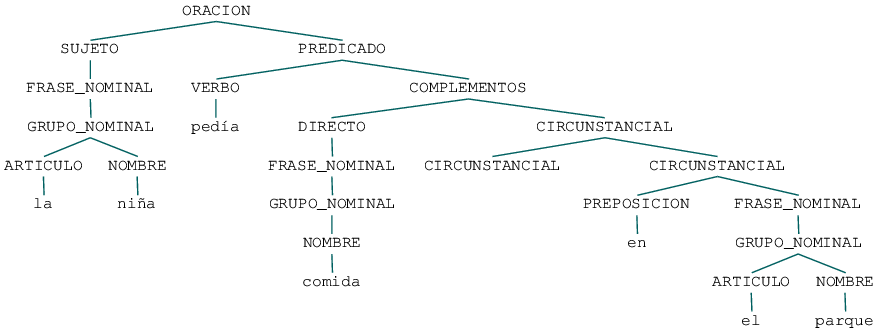

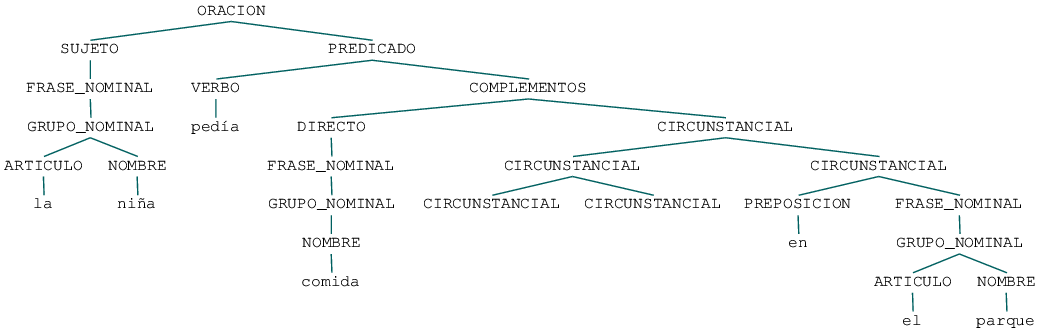

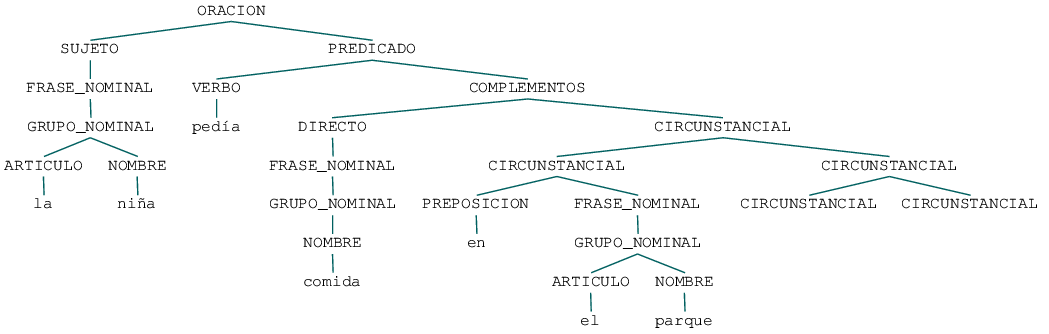

In [16]:
X2_sp = "la niña pedía comida en el parque"
print("Árbol de generación de la cadena \"{}\"".format(X2_sp))
for tree in parser_sp.parse(list(X2_sp.split())):
    display(tree) # tree.draw() arroja una ventana emergente

Las gramática de tipo 3 generan lenguajes regulares. Un lenguaje es regular si puede epresarse mediante una expresión regular. Aunque en este curso emplearemos Python como lenguaje de programación, el uso de expresiones regulares es muy similar en otros lenguajes.

## Gramáticas de tipo 3 y expresiones regulares

### El módulo <code>re</code> de Python

El módulo <code>re</code> de Python ofrece una colección de métodos para realizar operaciones sobre cadenas empleando expresiones regulares; los siguientes son algunos de los métodos en este módulo:

#### <code>re.match(s, string)</code>: 
Determina si la cadena <code>string</code> inicia con la cadena <code>s</code>:

In [3]:
import re

string = "La oveja negra ya se ha juntado\n\
a otras ovejas negras como él.\n\
Como no hay hierba fresca en el prado\n\
comen coronas de laurel."

print("1.", re.match("La oveja", string))
print("2.", re.match("La oveja negra", string))
print("3.", re.match("oveja", string))


1. <_sre.SRE_Match object; span=(0, 8), match='La oveja'>
2. <_sre.SRE_Match object; span=(0, 14), match='La oveja negra'>
3. None


#### <code>re.search(s, string)</code>: 
Busca si la cadena <code>s</code> es subcadena de <code>string</code> en cualquier punto. Regresa la primera ocurrencia.

In [4]:
print("4.", re.search("oveja", string))
print("5.", re.search("coronas de laurel", string))

4. <_sre.SRE_Match object; span=(3, 8), match='oveja'>
5. <_sre.SRE_Match object; span=(107, 124), match='coronas de laurel'>


#### <code>re.findall(s, string)</code>: 
Busca todas las ocurrencias de la cadena <code>s</code> en la cadena <code>string</code>, en cualquier punto y regresa las ocurrencias en una lista.

In [5]:
print("6.", re.findall("oveja", string))

6. ['oveja', 'oveja']


#### <code>re.finditer(s, string)</code>: 
Busca todas las ocurrencias de la cadena <code>s</code> en la cadena de <code>string</code> y regresa las ocurrencias en una lista.

In [6]:
it = re.finditer("oveja", string)
res_idx = 7
for item in it:
    print("{}. {}".format(res_idx, item))
    res_idx += 1

7. <_sre.SRE_Match object; span=(3, 8), match='oveja'>
8. <_sre.SRE_Match object; span=(40, 45), match='oveja'>


#### <code>re.sub(s, r, string[, count=0])</code>: 
Busca todas las ocurrencias de la cadena <code>s</code> en la cadena de <code>string</code> y reemplaza por la cadena <code>r</code>. El argumento opcional <code>count</code> define el número máximo de reemplazos. El valor cero indico "*todas*".

In [7]:
str0 = re.sub("oveja", "nave", string)
print("9.", str0)

str1 = re.sub("oveja", "nave", string, count=1)
print("\n10.", str1)

9. La nave negra ya se ha juntado
a otras naves negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.

10. La nave negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.


### Representación de patrones mediante expresiones regulares

La mayoría de los caracteres en una cadena son identificados de forma literal:

In [21]:
print("\n11.", re.sub("oveja", "OVEJA", string))


11. La OVEJA negra ya se ha juntado
a otras OVEJAs negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.


Sin embargo, la utilidad de las expresiones regulares se deriva de su capacidad para describir conjuntos amplios de cadenas mediante patrones. Esto se logra mediante el uso de caracteres especiales:

|Caracter |Resultado |
|---|----|
|**<code>'.'</code>** |El punto se empareja con cualquier caracter excepto el cambio de línea. Si se especifica la bandera <code>DOTALL</code> también empareja con el cambio de línea.|

In [22]:
print("\n12.", re.sub(".", "x", string))

print("\n13. Incluyendo DOTALL:\n{}".format(re.sub(".", "y", string, flags=re.DOTALL)))


12. xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
xxxxxxxxxxxxxxxxxxxxxxxx

13. Incluyendo DOTALL:
yyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyy


|Caracter |Resultado |
|---|----|
|**<code>'^'</code>** |Establece que la substitución sólo se hara al inicio de la cadena. Si se especifica la bandera <code>MULTILINE</code> también se realizará al inicio de cada nueva línea.|

In [23]:
print("\n14.", re.sub("^.", "--", string))

print("\n15. Incluyendo MULTILINE:\n{}".format(re.sub("^.", "--", string, flags=re.MULTILINE)))


14. --a oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.

15. Incluyendo MULTILINE:
--a oveja negra ya se ha juntado
-- otras ovejas negras como él.
--omo no hay hierba fresca en el prado
--omen coronas de laurel.


|Caracter |Resultado |
|---|----|
|**<code>'\A'</code>** | Establece que la substitución sólo se hara al inicio de la línea. No es afectado por la bandera <code>MULTILINE</code>.|

In [24]:
print("\n16.", re.sub("\A.", "--", string))

print("\n17. Incluyendo MULTILINE:\n{}".format(re.sub("\A.", "--", string, flags=re.MULTILINE)))


16. --a oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.

17. Incluyendo MULTILINE:
--a oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel.


|Caracter |Resultado |
|---|----|
|**<code>'$'</code>** |Establece que la substitución sólo se hará al final de la cadena. Si se especifica la bandera <code>MULTILINE</code> también se realizará al final de cada línea.|

In [25]:
print("\n18.", re.sub(".$", "--", string))

print("\n19. Incluyendo MULTILINE:\n{}".format(re.sub(".$", "--", string, flags=re.MULTILINE)))


18. La oveja negra ya se ha juntado
a otras ovejas negras como él.
Como no hay hierba fresca en el prado
comen coronas de laurel--

19. Incluyendo MULTILINE:
La oveja negra ya se ha juntad--
a otras ovejas negras como él--
Como no hay hierba fresca en el prad--
comen coronas de laurel--


|Caracter |Resultado |
|---|----|
|**<code>'[]'</code>** | Define un conjunto de caracteres. Pueden ser individuales (<code>'[abc]'</code>); en rango (<code>'[a-d]'</code>), se puede incluir el signo - utilizando la secuencia de escape <code>'\\-'</code> o colocándolo al final del conjunto (<code>'[a-d\-]'</code>). Caracteres especiales como  <code>'(', '+', '*', or ')'</code> pierden su significado dentro de los corchetes. |

In [26]:
print("\n20.", re.sub("[abc]", "x", string))

print("\n21. {}".format(re.sub("[d-g]", "x", string)))

print("\n22. {} -> {}".format("--a oveja negra ya se ha juntado",
                          re.sub("[a-d\-j]", "x", "--a oveja negra ya se ha juntado")))

print("\n23. {} -> {}".format("La estrella de Kleene (*)...",
                          re.sub("[(+*)]", "x", "La estrella de Kleene (*)...")))


20. Lx ovejx negrx yx se hx juntxdo
x otrxs ovejxs negrxs xomo él.
Como no hxy hierxx fresxx en el prxdo
xomen xoronxs de lxurel.

21. La ovxja nxxra ya sx ha juntaxo
a otras ovxjas nxxras como él.
Como no hay hixrba xrxsca xn xl praxo
comxn coronas xx laurxl.

22. --a oveja negra ya se ha juntado -> xxx ovexx negrx yx se hx xuntxxo

23. La estrella de Kleene (*)... -> La estrella de Kleene xxx...


|Caracter |Resultado |
|---|----|
|**<code>\w</code>** | Empareja con cualquier caracter de palabra: Un caracter unicode, un ideograma, un dígito o el guión bajo. |
|**<code>\W</code>** | Empareja con cualquier caracter que NO sea un caracter de palabra. |

In [27]:
print("\n24. {} -> {}".format("La estrella_de_Kleene (*)...",
                          re.sub("\w", "a", "La estrella_de_Kleene (*)...")))

print("\n25. {} -> {}".format("La estrella_de_Kleene (*)...",
                          re.sub("\W", "-", "La estrella_de_Kleene (*)...")))


24. La estrella_de_Kleene (*)... -> aa aaaaaaaaaaaaaaaaaa (*)...

25. La estrella_de_Kleene (*)... -> La-estrella_de_Kleene-------


|Caracter |Resultado |
|---|----|
|**<code>\s</code>** | Empareja con cualquier caracter de espacio; cualquier separador unicode. |
|**<code>\S</code>** | Empareja con cualquier caracter que NO sea un caracter de espacio/separeador. |

In [28]:
print("\n26. {} -> {}".format("La estrella_de_Kleene (*)...",
                          re.sub("\w", "a", "La estrella_de_Kleene (*)...")))

print("\n27. {} -> {}".format("La estrella_de_Kleene (*)...",
                          re.sub("\W", "-", "La estrella_de_Kleene (*)...")))


26. La estrella_de_Kleene (*)... -> aa aaaaaaaaaaaaaaaaaa (*)...

27. La estrella_de_Kleene (*)... -> La-estrella_de_Kleene-------


|Caracter |Resultado |
|---|----|
|**<code>\num** | Hace referencia al grupo que aparece en el orden señalado por *num*. Cada grupo se define mediante paréntesis. <code>\1</code> es, por ejemplo, el primer grupo que aparece en la expresión regular <code><([\w]+).*>(.*?)<\/\1></code>. En este caso la diagonal <code>\</code> se lee por separado de a etiqueta numérica, de manera que hay que utilizar cadenas en bruto (<code>r"\1"</code>) o especificar que se trata del caracter diagonal (<code>"\\\1"</code>).|

In [84]:
print("\n28. {} -> {}".format("La oveja oveja negra ya se ha juntado", 
                              re.sub(r"(\w+)\s+\1", "\\1", "La oveja oveja negra ya se ha juntado")))


28. La oveja oveja negra ya se ha juntado -> La oveja negra ya se ha juntado


In [68]:
print("\n{} -> {}".format("--a oveja negra ya se ha juntado",
                          re.sub("[a-d\-j]", "x", "--a oveja negra ya se ha juntado")))


--a oveja negra ya se ha juntado -> xxx ovexx negrx yx se hx xuntxxo


In [ ]:
re.search('={3}[\w]+={3}', "EJEMPLO ===funciona==parece") 

* URL's: <code>\w+:\/{2}[\d\w-]+(&#92;.[\d\w-]+)&#42;(?:(?:\/[^\s/]&#42;))&#42;</code>
![](images/regex01.png)<br>

* Tags de HTML: <code>(?i)<\/?\w+((\s+\w+(\s&#42;=\s&#42;(?:\".&#42;?\"|'.&#42;?'|[^'\">\s]+))?)+\s&#42;|\s&#42;)\/?></code>
![](images/regex02.png)<br>

* Passwords: <code>((?=.&#42;\d)(?=.&#42;[a-z])(?=.&#42;[A-Z])(?=.&#42;[@#$%]).{6,20})</code>
![](images/regex03.png)<br>

* Tags de HTML: <code><([\w]+).&#42;>(.&#42;?)<\/\1></code>
![](images/regex04.png)<br>

## Conclusiones

<hr style="border-width: 3px;">

### Tarea 1

Describa un problema de reconocimiento de patrones de su interés y explique por qué un modelo tradicional sería inapropiado para resolverlo (utilice la celda siguiente, en esta libreta, para presentar su problema seleccionado).

**Fecha de entrega**: Viernes 20 de enero.